In [1]:
import pandas as pd

stocks = pd.read_csv('stocks.csv', header='infer' ) 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
stocks = stocks.drop(['F'],axis=1)
stocks.head()

,MSFT,BAC
Date,,
1/3/2007,29.860001,53.330002
1/4/2007,29.809999,53.669998
1/5/2007,29.639999,53.240002
1/8/2007,29.930000,53.450001
1/9/2007,29.959999,53.500000


In [2]:
import numpy as np

N,d = stocks.shape
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)
delta.head()

,MSFT,BAC
Date,,
1/4/2007,-0.167455,0.637532
1/5/2007,-0.570278,-0.801185
1/8/2007,0.978411,0.394438
1/9/2007,0.100231,0.093543
1/10/2007,-1.001332,0.149536


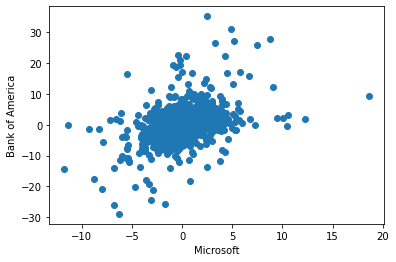

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

#fig = plt.figure(figsize=(8,5)).gca(projection='2d')
plt.scatter(delta.MSFT,delta.BAC)
plt.xlabel('Microsoft')
#fig.set_ylabel('Ford')
plt.ylabel('Bank of America')
plt.show()

In [4]:
meanValue = delta.mean()
covValue = delta.cov()
print(meanValue)
print(covValue)

MSFT    0.045003
BAC     0.033351
dtype: float64
          MSFT        BAC
MSFT  3.191674   2.788870
BAC   2.788870  13.770761


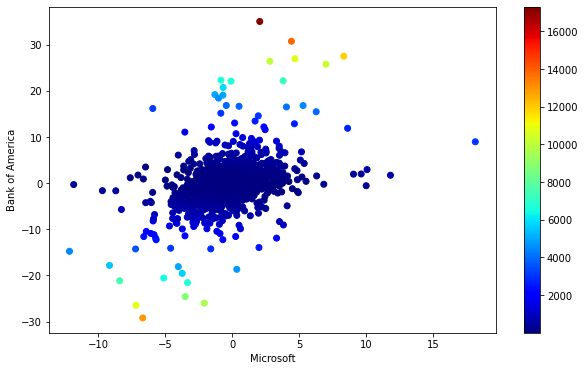

In [14]:
from numpy.linalg import inv

X = delta.values
S = covValue.values
for i in range(2):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)

fig = plt.figure(figsize=(10,6))
#ax = fig.add_subplot(111, projection='3d')
p = plt.scatter(delta.MSFT,delta.BAC,c=anomaly_score,cmap='jet')
plt.xlabel('Microsoft')
plt.ylabel('Bank of America')
plt.colorbar(p)
plt.show()

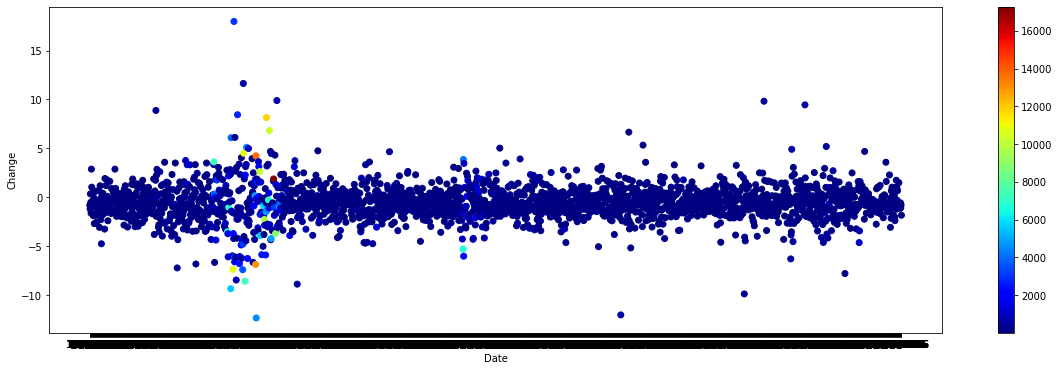

In [18]:
from numpy.linalg import inv

X = delta.values
S = covValue.values
for i in range(1):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)

fig = plt.figure(figsize=(20,6))
#ax = fig.add_subplot(111, projection='3d')
p = plt.scatter(delta.index,delta.MSFT,c=anomaly_score,cmap='jet')
plt.ylabel('Change')
plt.xlabel('Date')
plt.colorbar(p)
plt.show()